In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

('2017-08-23',)


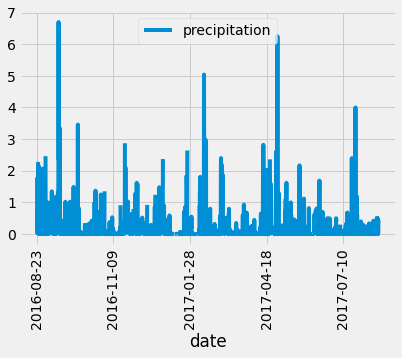

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(latest_date)
last_12_month = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
query_resutl = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_12_month).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
pdframe = pd.DataFrame(query_resutl, columns=['date', 'precipitation'])
set_index = pdframe.set_index('date')
# Sort the dataframe by date
sort_df = set_index.sort_values('date')
# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot(rot=90)
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.station)).all()

[(9,)]

In [39]:
# number of rows
row_count = session.query(measurement).count()
print(row_count)

19550


In [42]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_activate_row = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_activate_row

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session_id = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()[0]

lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == session_id).all()
highst_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == session_id).all()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == session_id).all()
print(lowest_temp)
print(highst_temp)
print(avg_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [54]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normal = []

# Set the start and end date of the trip
# just random date
start = dt.date(2011, 1, 1)
end = dt.date(2011, 3, 1)

# Use the start and end date to create a range of dates
date_list = [] 
format_date_list = []
for i in range((end-start).days + 1):
    date_list.append(start + dt.timedelta(days=i))
print(date_list)
# Stip off the year and save a list of %m-%d strings
for i in date_list:
    date = i.strftime('%m-%d')
    format_date_list.append(date)
print(format_date_list)

# Loop through the list of %m-%d strings and calculate the normals for each date
for i in format_date_list:
    query_result = session.query(func.avg(measurement.tobs)).filter(func.strftime("%m-%d", measurement.date) == i).all()
    normal.append(query_result)

[datetime.date(2011, 1, 1), datetime.date(2011, 1, 2), datetime.date(2011, 1, 3), datetime.date(2011, 1, 4), datetime.date(2011, 1, 5), datetime.date(2011, 1, 6), datetime.date(2011, 1, 7), datetime.date(2011, 1, 8), datetime.date(2011, 1, 9), datetime.date(2011, 1, 10), datetime.date(2011, 1, 11), datetime.date(2011, 1, 12), datetime.date(2011, 1, 13), datetime.date(2011, 1, 14), datetime.date(2011, 1, 15), datetime.date(2011, 1, 16), datetime.date(2011, 1, 17), datetime.date(2011, 1, 18), datetime.date(2011, 1, 19), datetime.date(2011, 1, 20), datetime.date(2011, 1, 21), datetime.date(2011, 1, 22), datetime.date(2011, 1, 23), datetime.date(2011, 1, 24), datetime.date(2011, 1, 25), datetime.date(2011, 1, 26), datetime.date(2011, 1, 27), datetime.date(2011, 1, 28), datetime.date(2011, 1, 29), datetime.date(2011, 1, 30), datetime.date(2011, 1, 31), datetime.date(2011, 2, 1), datetime.date(2011, 2, 2), datetime.date(2011, 2, 3), datetime.date(2011, 2, 4), datetime.date(2011, 2, 5), datet

In [55]:
normal

[[(69.15384615384616,)],
 [(69.39622641509433,)],
 [(68.9090909090909,)],
 [(70.0,)],
 [(67.96428571428571,)],
 [(68.96491228070175,)],
 [(68.54385964912281,)],
 [(67.16071428571429,)],
 [(67.9298245614035,)],
 [(69.74137931034483,)],
 [(67.3103448275862,)],
 [(67.4074074074074,)],
 [(67.25454545454545,)],
 [(69.52631578947368,)],
 [(69.31372549019608,)],
 [(68.62962962962963,)],
 [(69.07407407407408,)],
 [(68.63157894736842,)],
 [(68.26315789473684,)],
 [(68.86666666666666,)],
 [(70.14545454545454,)],
 [(69.26415094339623,)],
 [(69.50909090909092,)],
 [(68.76271186440678,)],
 [(67.94915254237289,)],
 [(70.58620689655173,)],
 [(68.56896551724138,)],
 [(69.03703703703704,)],
 [(69.14,)],
 [(67.12962962962963,)],
 [(68.47368421052632,)],
 [(68.14035087719299,)],
 [(68.85964912280701,)],
 [(67.79661016949153,)],
 [(68.14035087719299,)],
 [(69.6842105263158,)],
 [(70.38983050847457,)],
 [(69.0,)],
 [(66.75438596491227,)],
 [(67.58928571428571,)],
 [(68.41666666666667,)],
 [(69.25,)],
 [(69

In [75]:
# list of frequency for each temperature in last 12 months
tobs = {}
start_date = dt.date(2017, 8, 23)
end_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_result = session.query(measurement.tobs).filter(measurement.date >= end_date).filter(measurement.date <= start_date).all()
for i in query_result:
    if i in tobs:
        tobs[i] += 1
    else:
        tobs[i] = 1
print(tobs)

{(81.0,): 89, (79.0,): 158, (80.0,): 156, (77.0,): 212, (78.0,): 198, (75.0,): 171, (76.0,): 210, (82.0,): 42, (71.0,): 121, (72.0,): 125, (74.0,): 174, (73.0,): 117, (68.0,): 56, (69.0,): 92, (67.0,): 54, (70.0,): 110, (66.0,): 31, (62.0,): 13, (63.0,): 15, (64.0,): 23, (60.0,): 6, (65.0,): 28, (61.0,): 4, (87.0,): 2, (83.0,): 12, (84.0,): 6, (85.0,): 1, (59.0,): 3, (58.0,): 1}


[81.0, 79.0, 80.0, 77.0, 78.0, 75.0, 76.0, 82.0, 71.0, 72.0, 74.0, 73.0, 68.0, 69.0, 67.0, 70.0, 66.0, 62.0, 63.0, 64.0, 60.0, 65.0, 61.0, 87.0, 83.0, 84.0, 85.0, 59.0, 58.0]
[89, 158, 156, 212, 198, 171, 210, 42, 121, 125, 174, 117, 56, 92, 54, 110, 31, 13, 15, 23, 6, 28, 4, 2, 12, 6, 1, 3, 1]


(array([ 10.,  17.,  66.,  85., 258., 246., 291., 593., 356., 287.,  18.,
          3.]),
 array([58.        , 60.41666667, 62.83333333, 65.25      , 67.66666667,
        70.08333333, 72.5       , 74.91666667, 77.33333333, 79.75      ,
        82.16666667, 84.58333333, 87.        ]),
 <BarContainer object of 12 artists>)

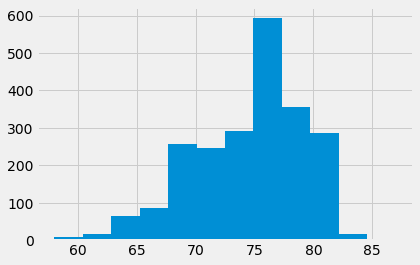

In [79]:
# plot according to the frequency
# hist diagram
temperature_list = []
frequency_list = []
for i in tobs:
    temperature_list.append(i[0])
    frequency_list.append(tobs[i])
print(temperature_list)
print(frequency_list)
# bins = 12
plt.hist(temperature_list, bins=12, weights=frequency_list)